In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.options.display.float_format = lambda x: f'{x:.3f}'

In [2]:
# train file exploration
train_df = pd.read_csv("../data/zillow-prize-1/train_2016_v2.csv", parse_dates=["transactiondate"])
train_df.shape

(90275, 3)

In [3]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.028,2016-01-01
1,14366692,-0.168,2016-01-01
2,12098116,-0.004,2016-01-01
3,12643413,0.022,2016-01-02
4,14432541,-0.005,2016-01-02


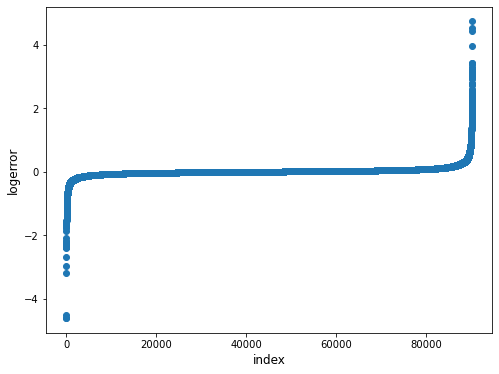

In [4]:
## Logerror : 이번 대회의 목표값인 "logerrr" 변수를 보자. 이것이 분석의 첫걸음이다.

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

양쪽 끝에 이상치 값들이 보인다. 이상치 값을 제고하고 histogram plot을 보자.

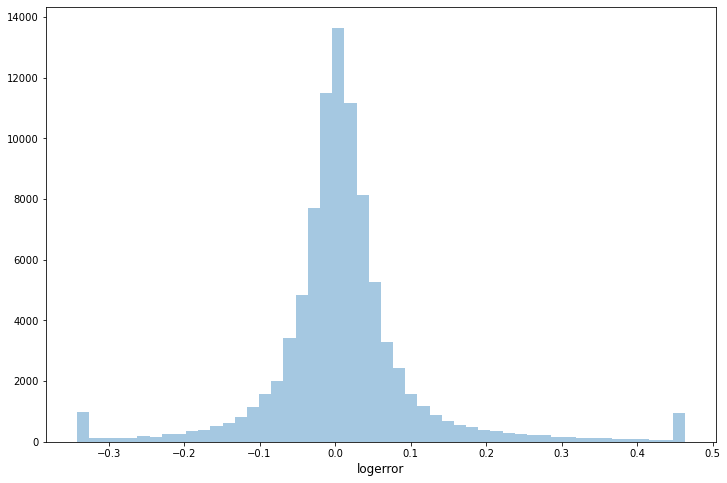

In [5]:
# 값의 99%에 해당하는 값을 upper limit 값으로 지정
ulimit = np.percentile(train_df.logerror.values, 99)
# 값의 1%에 해당하는 값을 lower limit 값으로 지정
llimit = np.percentile(train_df.logerror.values, 1)

# ulimit 보다 큰 logerror는 ulimit 값으로 대체
train_df['logerror'][train_df['logerror'] > ulimit] = ulimit
# llimit 보다 작은 logerror는 llimit 값으로 대체
train_df['logerror'][train_df['logerror'] < llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

normal한 분포가 되었다.

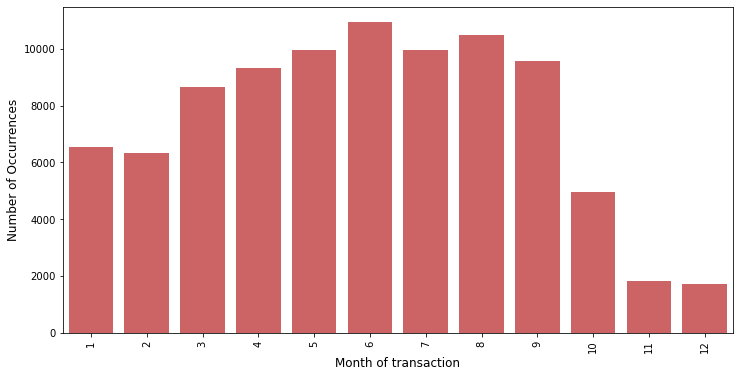

In [6]:
##Transaction Date : date 변수를 알아보자. 매월 발생한 trascations 수를 체크한다.

train_df['transaction_month'] = train_df['transactiondate'].dt.month
cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

차트를 보면, train 데이터는 2016년 10월 15일 이전의 모든 거래와 2016년 10월 15일 이후 일부 거래가 포함된다.
그래서 우리는 3개월 동안 짧은 bar를 가지고 있다.

In [7]:
train_df['parcelid'].value_counts().reset_index()

,index,parcelid
0,11842707,3
1,12613442,2
2,12032773,2
3,11729067,2
4,11845988,2
...,...,...
90145,11199862,1
90146,11726199,1
90147,12096888,1
90148,11181433,1


In [8]:
# ParceId
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

대부분의 parcelid 는 한번씩 나타난다.

In [9]:
# 2016년도의 특징
prop_df = pd.read_csv("../data/zillow-prize-1/properties_2016.csv")
prop_df.shape

c:\users\hanbit\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [10]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34144442.000,-118654084.000,85768.000,nan,nan,nan,nan,nan,010D,269.000,NaN,60378002.041,37688.000,3101.000,nan,96337.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,9.000,2015.000,9.000,nan,NaN,nan,nan
1,10759547,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34140430.000,-118625364.000,4083.000,nan,nan,nan,nan,nan,0109,261.000,LCA11*,60378001.011,37688.000,3101.000,nan,96337.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,27516.000,2015.000,27516.000,nan,NaN,nan,nan
2,10843547,nan,nan,nan,0.000,0.000,nan,nan,nan,nan,nan,73026.000,nan,nan,73026.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,33989359.000,-118394633.000,63085.000,nan,nan,nan,nan,nan,1200,47.000,LAC2,60377030.012,51617.000,3101.000,nan,96095.000,0.000,nan,nan,nan,2.000,nan,nan,nan,nan,NaN,650756.000,1413387.000,2015.000,762631.000,20800.370,NaN,nan,nan
3,10859147,nan,nan,nan,0.000,0.000,3.000,7.000,nan,nan,nan,5068.000,nan,nan,5068.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34148863.000,-118437206.000,7521.000,nan,nan,nan,nan,nan,1200,47.000,LAC2,60371412.023,12447.000,3101.000,27080.000,96424.000,0.000,nan,nan,nan,nan,nan,nan,1948.000,1.000,NaN,571346.000,1156834.000,2015.000,585488.000,14557.570,NaN,nan,nan
4,10879947,nan,nan,nan,0.000,0.000,4.000,nan,nan,nan,nan,1776.000,nan,nan,1776.000,nan,nan,6037.000,nan,nan,nan,nan,NaN,nan,34194168.000,-118385816.000,8512.000,nan,nan,nan,nan,nan,1210,31.000,LAM1,60371232.052,12447.000,3101.000,46795.000,96450.000,0.000,nan,nan,nan,1.000,nan,nan,1947.000,nan,NaN,193796.000,433491.000,2015.000,239695.000,5725.170,NaN,nan,nan


많은 NaN 값이 보인다. 우선 missing value 분포부터 보자.

In [11]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()

In [12]:
missing_df

,index,0
0,parcelid,0
1,airconditioningtypeid,2173698
2,architecturalstyletypeid,2979156
3,basementsqft,2983589
4,bathroomcnt,11462
5,bedroomcnt,11450
6,buildingclasstypeid,2972588
7,buildingqualitytypeid,1046729
8,calculatedbathnbr,128912
9,decktypeid,2968121


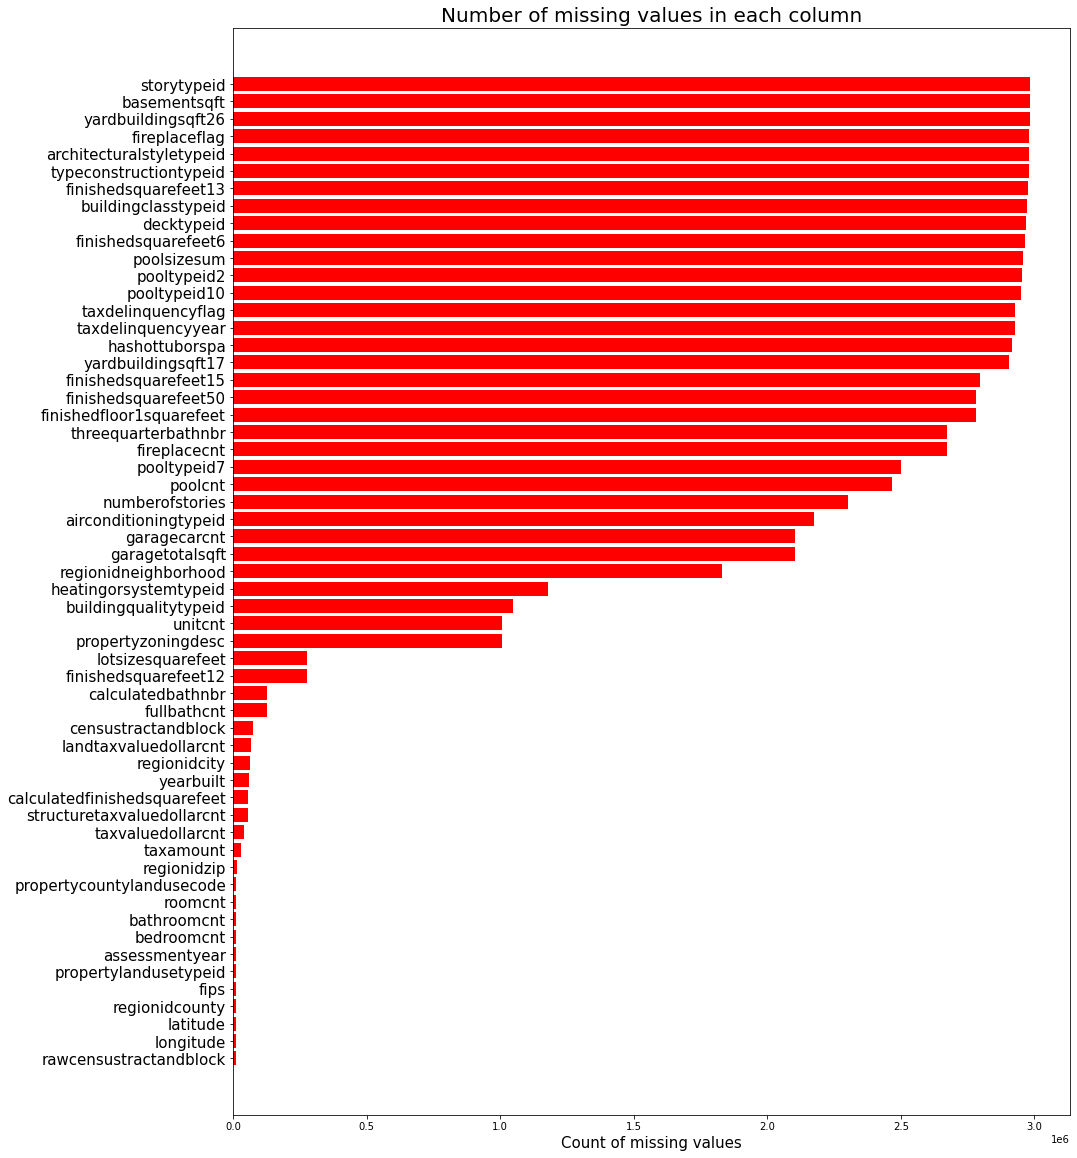

In [13]:
missing_df.columns= ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width=0.9
fig, ax = plt.subplots(figsize=(15,20))
rects = ax.barh(ind, missing_df.missing_count.values, color='r')
ax.set_yticks(ind )
ax.set_yticklabels(missing_df.column_name.values, rotation= 'horizontal', fontsize=15)
ax.set_xlabel("Count of missing values", fontsize=15)
ax.set_title("Number of missing values in each column", fontsize=20)
plt.show()

이젠 위도와 경도별 데이터의 분포를 보자.

c:\users\hanbit\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

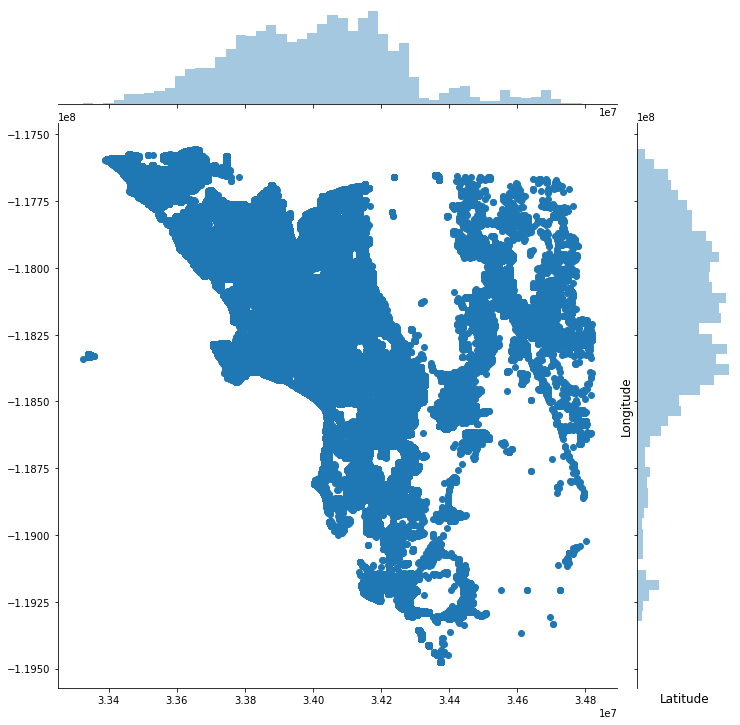

In [14]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

위의 지도를 보면, 2016년 3개의 counties(Los angeles, Orange and Ventura, California)의 부동산 전체 목록을 제공한다. 

우리는 trian에서 90,275개의 행과 properties file에는 2,985,217 행을 가지고 있다. 

In [15]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.028,2016-01-01,1,1.000,nan,nan,2.000,3.000,nan,4.000,2.000,nan,nan,1684.000,1684.000,nan,nan,nan,nan,6037.000,nan,2.000,nan,nan,NaN,2.000,34280990.000,-118488536.000,7528.000,nan,nan,nan,nan,nan,0100,261.000,LARS,60371066.461,12447.000,3101.000,31817.000,96370.000,0.000,nan,nan,nan,1.000,nan,nan,1959.000,nan,NaN,122754.000,360170.000,2015.000,237416.000,6735.880,NaN,nan,60371066461001.000
1,14366692,-0.168,2016-01-01,1,nan,nan,nan,3.500,4.000,nan,nan,3.500,nan,nan,2263.000,2263.000,nan,nan,nan,nan,6059.000,nan,3.000,2.000,468.000,NaN,nan,33668120.000,-117677556.000,3643.000,nan,nan,nan,nan,nan,1,261.000,NaN,60590524.222,32380.000,1286.000,nan,96962.000,0.000,nan,1.000,nan,nan,nan,nan,2014.000,nan,NaN,346458.000,585529.000,2015.000,239071.000,10153.020,NaN,nan,nan
2,12098116,-0.004,2016-01-01,1,1.000,nan,nan,3.000,2.000,nan,4.000,3.000,nan,nan,2217.000,2217.000,nan,nan,nan,nan,6037.000,nan,3.000,nan,nan,NaN,2.000,34136312.000,-118175032.000,11423.000,nan,nan,nan,nan,nan,0100,261.000,PSR6,60374638.003,47019.000,3101.000,275411.000,96293.000,0.000,nan,nan,nan,1.000,nan,nan,1940.000,nan,NaN,61994.000,119906.000,2015.000,57912.000,11484.480,NaN,nan,60374638003004.000
3,12643413,0.022,2016-01-02,1,1.000,nan,nan,2.000,2.000,nan,4.000,2.000,nan,nan,839.000,839.000,nan,nan,nan,nan,6037.000,nan,2.000,nan,nan,NaN,2.000,33755800.000,-118309000.000,70859.000,nan,nan,nan,nan,nan,010C,266.000,LAR3,60372963.002,12447.000,3101.000,54300.000,96222.000,0.000,nan,nan,nan,1.000,nan,nan,1987.000,nan,NaN,171518.000,244880.000,2015.000,73362.000,3048.740,NaN,nan,60372963002002.000
4,14432541,-0.005,2016-01-02,1,nan,nan,nan,2.500,4.000,nan,nan,2.500,nan,nan,2283.000,2283.000,nan,nan,nan,nan,6059.000,nan,2.000,2.000,598.000,NaN,nan,33485643.000,-117700234.000,6000.000,1.000,nan,nan,nan,1.000,122,261.000,NaN,60590423.381,17686.000,1286.000,nan,96961.000,8.000,nan,1.000,nan,nan,nan,nan,1981.000,2.000,NaN,169574.000,434551.000,2015.000,264977.000,5488.960,NaN,nan,60590423381006.000


우선 두파일의 변수의 데이터 타입을 확인해보자.

In [16]:
pd.options.display.max_rows = 118

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


대부분 datatype 은 float64형이다. 이제 타입별로 count 해보자.

In [17]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


이제 새로운 병합된 데이터 집합의 Null 수를 확인해보자.

In [18]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count']  / train_df.shape[0]
missing_df[missing_df['missing_ratio'] > 0.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90232,1.000
9,buildingclasstypeid,90259,1.000
16,finishedsquarefeet13,90242,1.000
44,storytypeid,90232,1.000


missing value가 100% 컬럼도 있다. 이것은 추후에 작업해준다.

c:\users\hanbit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
c:\users\hanbit\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\hanbit\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


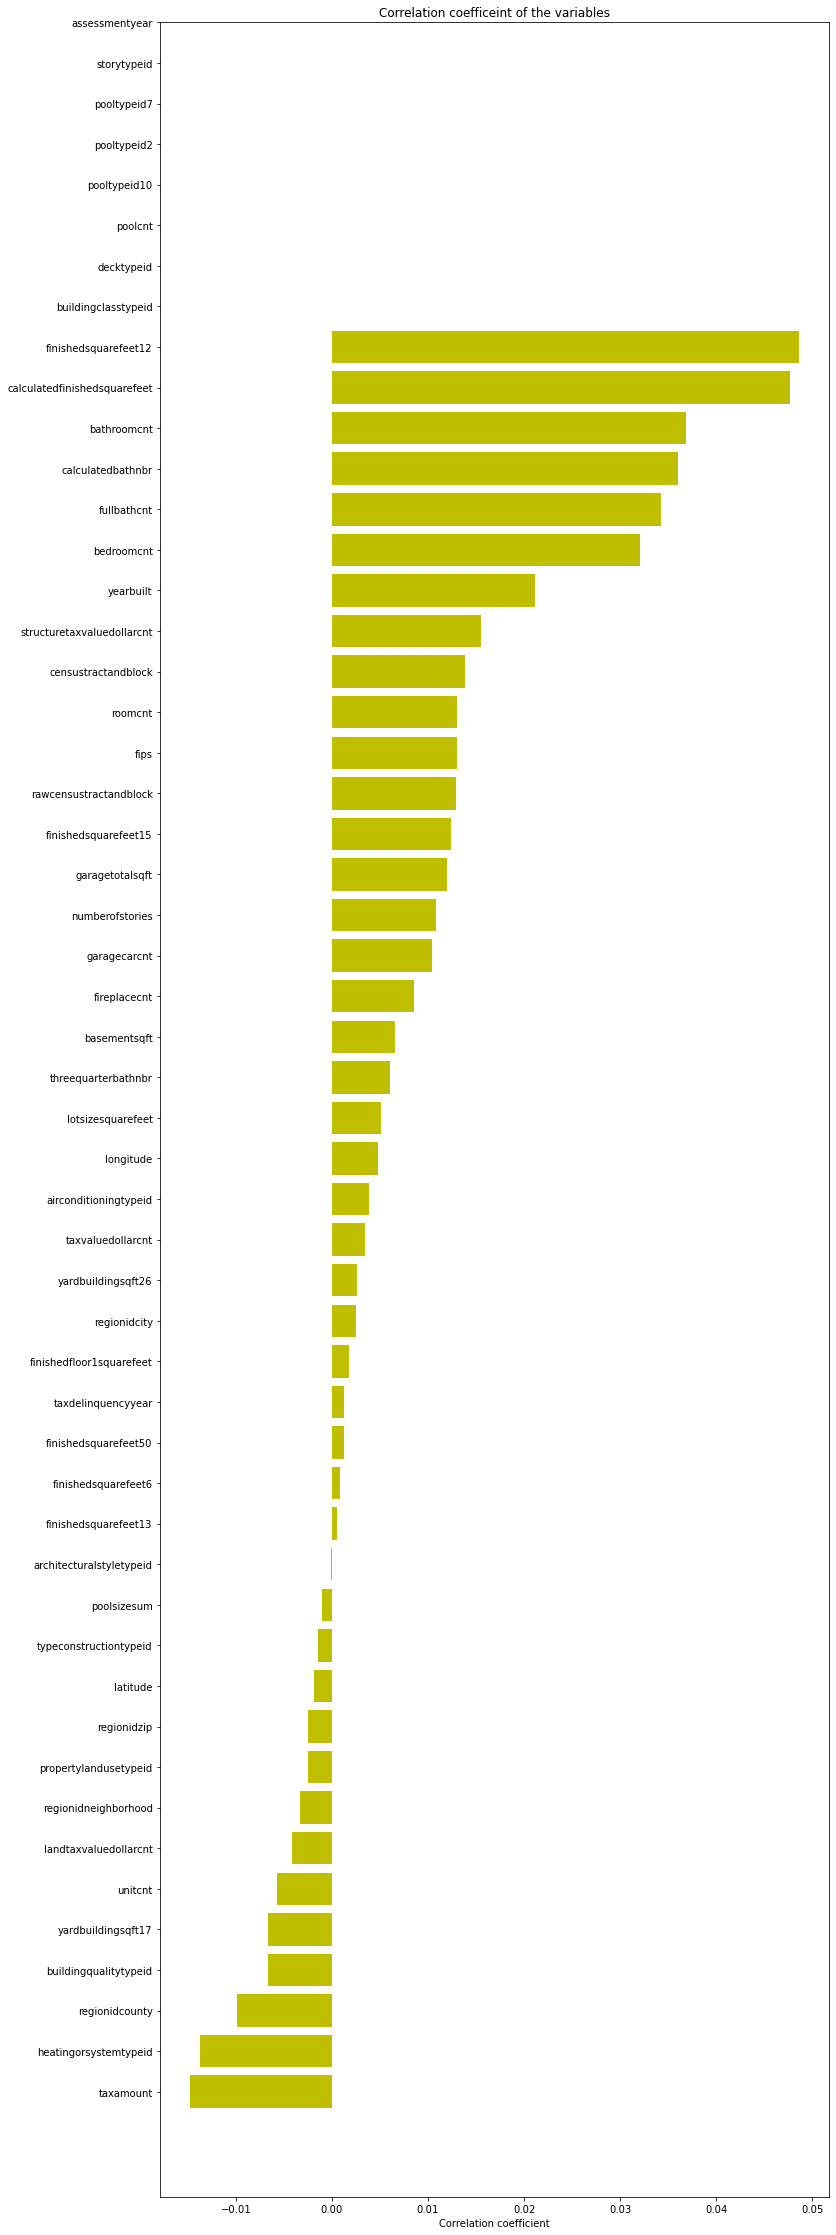

In [19]:
# 일변량 분석
# 변수가 너무 많으니 'float'변수만 가지고 target변수와의 연관성을 보자.

mean_values = train_df.mean(axis=0)
train_df.fillna(mean_values, inplace=True)
train_df_new = train_df
x_cols = [col for col in train_df_new.columns 
          if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []

for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, 
                             train_df.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation= 'horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficeint of the variables")
plt.show()


target 변수와 주어진 변수의 상관 관계는 낮게 나온다

어떤 상관관계 값이 없는 것은 그래프의 맨위에 변수가 몇개 없다.아마 단지 하나의 고유 값만 가지고 있어서 상관관계가 없을꺼라고 추정한다. 정말 맞는지 확인해보자.


In [20]:
corr_zero_cols=['assessmentyear', 'storytypeid', 'pooltypeid7','pooltypeid2',
               'pooltypeid10','poolcnt','decktypeid','buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid7 1
pooltypeid2 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


앞에서 추정한대로 unique한 값이 1로 나왔다. (추후 모델링할때 제거 해도 될것 같다.)
이젠 높은 상관관계가 나오는 변수에 대해서 분석해보자.

In [21]:
corr_df_sel = corr_df[(corr_df['corr_values'] > 0.02)| 
                      (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
49,taxamount,-0.015
21,heatingorsystemtypeid,-0.014
43,yearbuilt,0.021
4,bedroomcnt,0.032
18,fullbathcnt,0.034
7,calculatedbathnbr,0.036
3,bathroomcnt,0.037
10,calculatedfinishedsquarefeet,0.048
11,finishedsquarefeet12,0.049


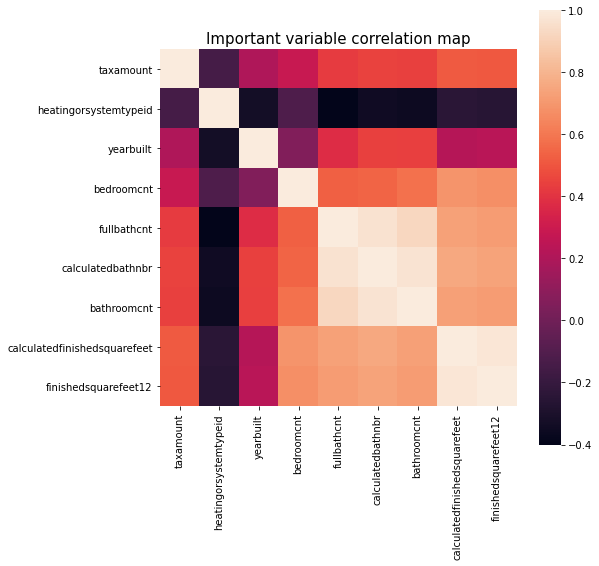

In [22]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8,8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variable correlation map", fontsize=15)
plt.show()

중요한 변수들은 그 자체로 상관관계가 높게 나온다. 이제 그 변수들을 하나씩 살펴보자.

c:\users\hanbit\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

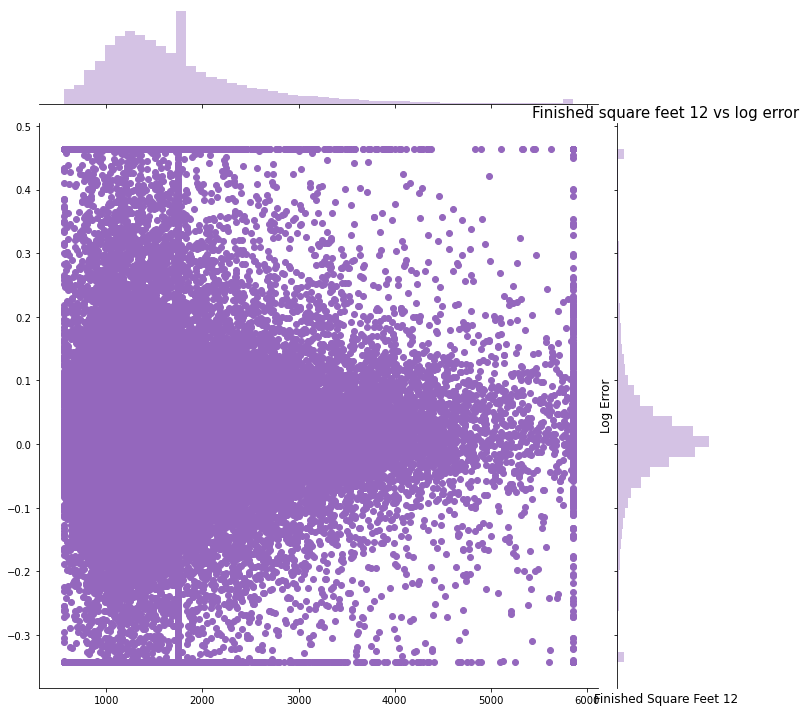

In [23]:
# Finished SquareFeet 12:
# 완성된 평방 비트12 변수 가 로그 오류에 따라 어떻게 변하는지 보자.

col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col][train_df[col] > ulimit] = ulimit
train_df[col][train_df[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.finishedsquarefeet12.values, y=train_df.logerror.values,
             size = 10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 vs log error", fontsize = 15)
plt.show()

완성된 평방피트 12변수의 증가함으로써, 로그 오류의 범위가 좁혀지는 것 같다. 
아마도 더 큰 집(평방피트가 큰)은 오류가 적으므로 예측하기 쉬운 것으로 보인다. 

c:\users\hanbit\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

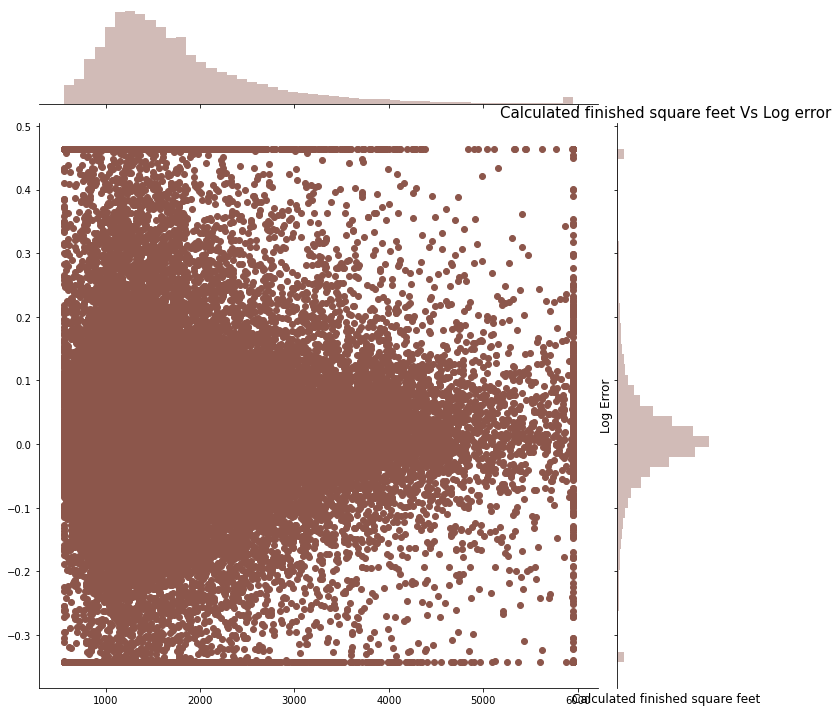

In [24]:
# Calculated finished square feet:
col = "calculatedfinishedsquarefeet"

ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)

train_df[col][train_df[col]>ulimit] = ulimit
train_df[col][train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values, y=train_df.logerror.values,
             size=10, color=color[5])

plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated finished square feet', fontsize=12)
plt.title("Calculated finished square feet Vs Log error", fontsize=15)
plt.show()

위의 분포와 유사하다. 아마 두 변수 사이에는 상관관계가 높은것을 추정할 수 있다.

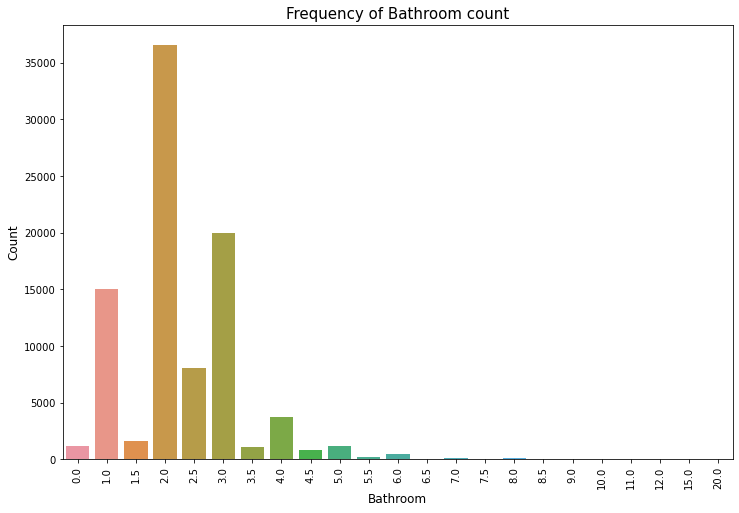

In [25]:
# Bathroom Count:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data = train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation = 'vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

2개 인경우가 압도적으로 많다.
이번엔 bathroom count와 logerror의 상관관계에 대해서 알아보자.

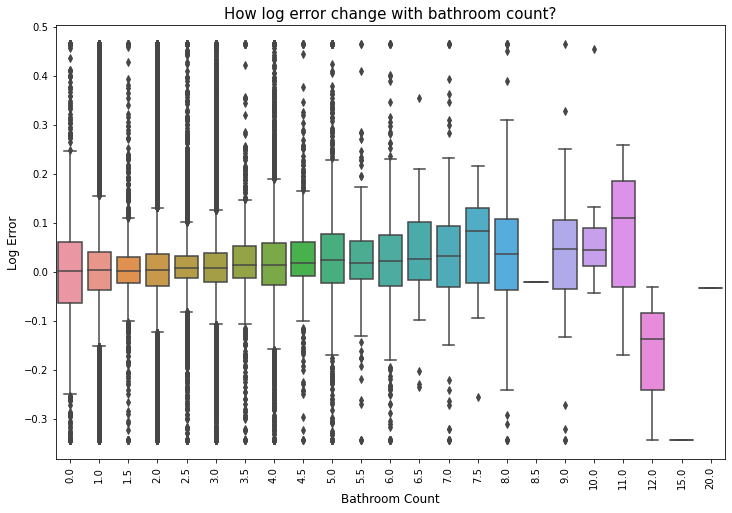

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data = train_df)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation = 'vertical')
plt.title("How log error change with bathroom count?", fontsize=15)
plt.show()

- bathroom 크기가 크면 클수록 4분위 범위가 커진다.
-bathroom 크기가 작을 수록 이상치 값이 많이 분포되어 있다. 즉, log error가 다양하게 분포되어 있다는 것을 의미한다.

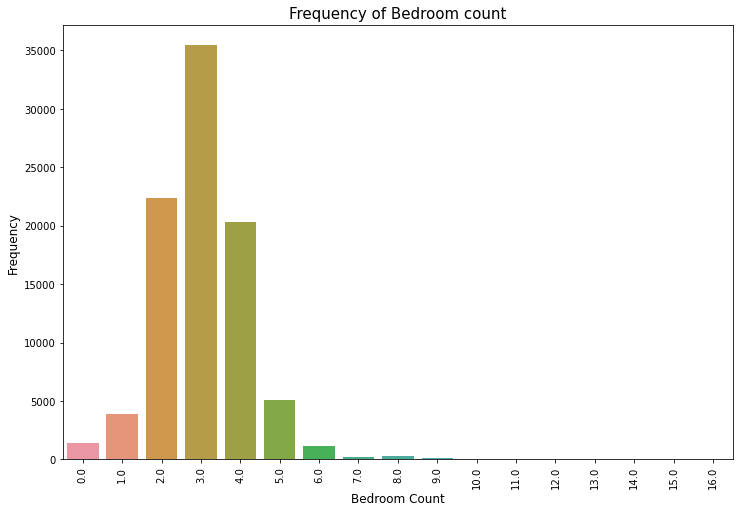

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data = train_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation = 'vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

- bedroom은 3, 2, 4개 순으로 많다.

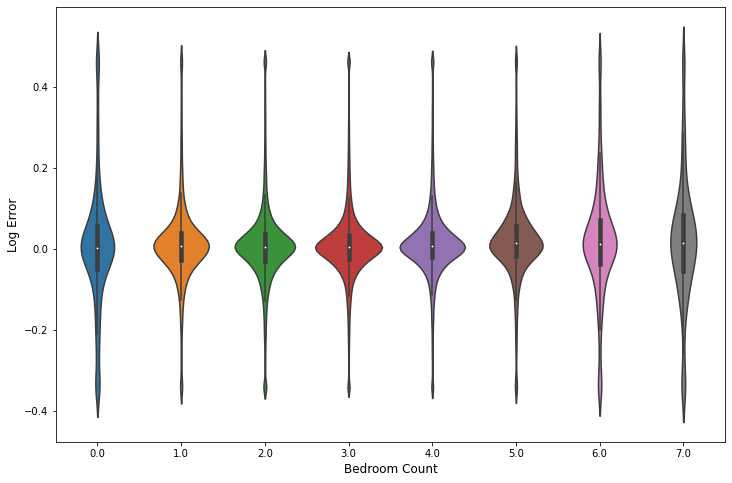

In [28]:
# bedroom이 7이 넘으면 7로 설정한다. 
train_df['bedroomcnt'][train_df['bedroomcnt']>7] = 7

plt.figure(figsize=(12,8))
sns.violinplot(x="bedroomcnt", y="logerror", data = train_df)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.show()

-대체적으로 골고루 logerror 값이 0을 기준으로 -0.2 ~ 0.2 범위 안에 분포되어 있다.

c:\users\hanbit\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

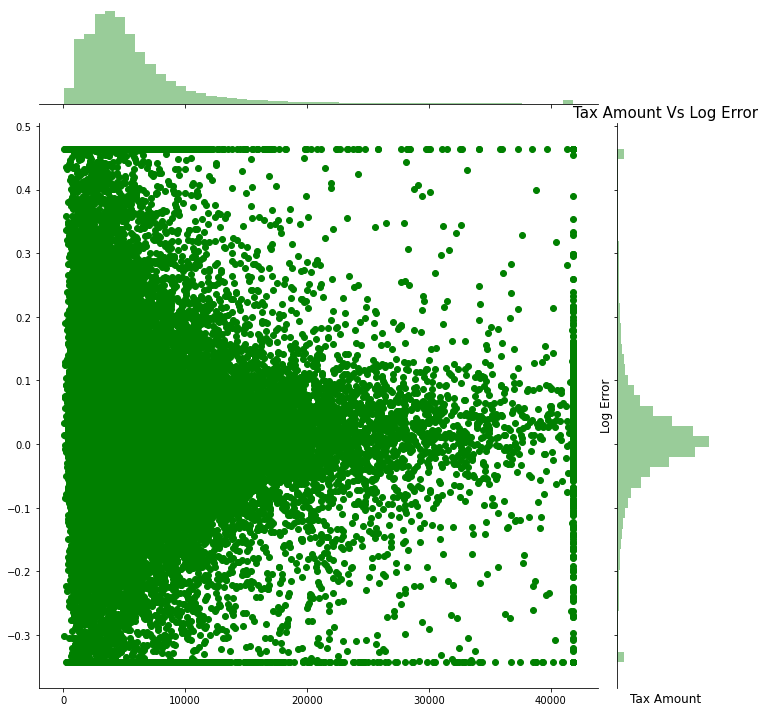

In [29]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 99.5)
train_df[col][train_df[col]>ulimit] = ulimit
train_df[col][train_df[col]>llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df['taxamount'].values, y=train_df['logerror'].values,
             size=10, color='g')

plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amount', fontsize=12)
plt.title("Tax Amount Vs Log Error", fontsize=15)
plt.show()

- tax 양이 적을 수록 log error 가 0에 가깝다.

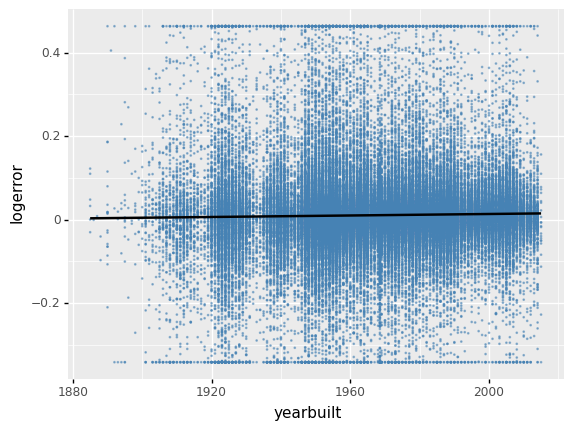

<ggplot: (-9223371869473076500)>

In [41]:
# YearBuilt:
# yearBuile(지어진 년도)와 error 변수가 어떻게 상관이 있는지 알아보자.
# R에서 사용하는 ggplot 차트를 사용하기 위해 plotline을 import함.
from plotnine import *

ggplot(data=train_df, mapping=aes(x='yearbuilt', y='logerror')) + \
    geom_point(color='steelblue', size =0.1, alpha = 0.5) + \
    stat_smooth()    

- yearbuilt(건설년도)에는 조금 증가하는 추세가 보임.

자 아래는 위도와 경도에 따라 로그 오류가 어떻게 변하는지 알아보자.

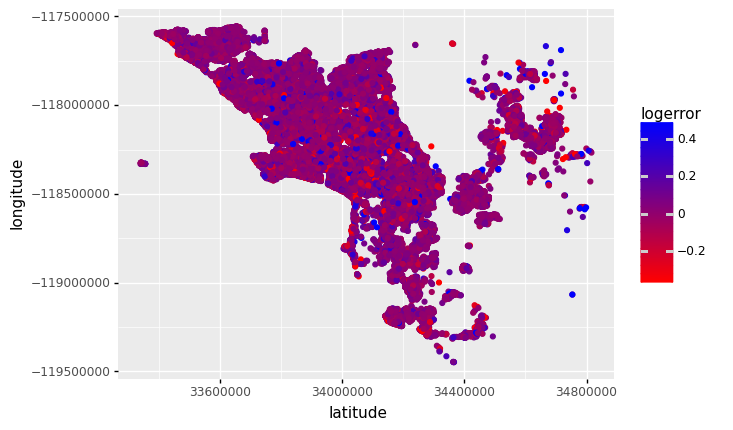

<ggplot: (-9223371869458461328)>

In [44]:
ggplot(data=train_df, mapping=aes(x='latitude', y ='longitude', color='logerror'))+\
    geom_point() + \
    scale_color_gradient(low='red', high='blue')

- 위의 그래프로 봤을땐, 위도나 경도 관련해서는 특이점을 발견하지 못했다.
- 가장 높은 상관 관계를 가진 'finishedsquarefeet12' 변수와, 가장 낮은 상관관계를 가진 'taxamount' 변수를 가시적인 패턴으로 출력해보자.

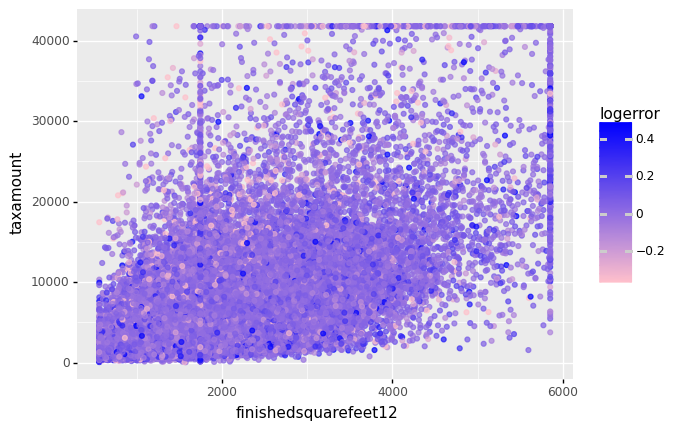

<ggplot: (-9223371869470737232)>

In [45]:
ggplot(data=train_df, mapping=aes(x='finishedsquarefeet12', y ='taxamount', color='logerror'))+\
    geom_point(alpha=0.7) + \
    scale_color_gradient(low='pink', high='blue')

- 위의 그래프에도 가시적인 패턴은 보이지 않는다. (아마 어려운 예측이 될것 같다.)
- 지금까지는 데이터 패턴 분석을 통해 일변량 분석에서 중요한 변수를 이해했다. 
하지만 이런 분석 기법은 독립적인 성격과 선형성 가정을 가지고 있다. 
- 이제부턴 엑스트라 트리 모델을 구축하여 중요한 변수를 얻을 수 있는 비선형 모델을 구축해보자.

In [52]:
train_y = train_df['logerror'].values
# 카테고리 변수 리스트
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
# 트리 모델 분석시 수치형 변수를 제외한 target 컬럼 범주형 변수, 날짜형 변수등과 같이 필요 없는 컬럼은 삭제 하고, 
# 분석하고 싶은 수치형 변수만 남긴다.한다.
# axis=1 컬럼을 삭제 (cf : axis=0 은 행을 삭제)
train_df = train_df.drop(['parcelid', 'logerror','transactiondate','transaction_month']+cat_cols, axis=1)

# 그래프에 차례대로 출력하기 위해 변수명을 가져온다.
feat_names = train_df.columns.values

from sklearn import ensemble


In [55]:
# model 구축
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
# model fitting x 값과 y 값.
model.fit(train_df, train_y)

ExtraTreesRegressor(max_depth=30, max_features=0.3, n_estimators=25, n_jobs=-1,
                    random_state=0)

In [62]:
indices.shape

(20,)

In [63]:
# 중요도 확인
importances = model.feature_importances_
# 중요도를 표준편차(std:standard deviation)으로 출력
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
# 중요도 정렬하여 상위 20개만 가져옴.
indices = np.argsort(importances)[::-1][:20] 

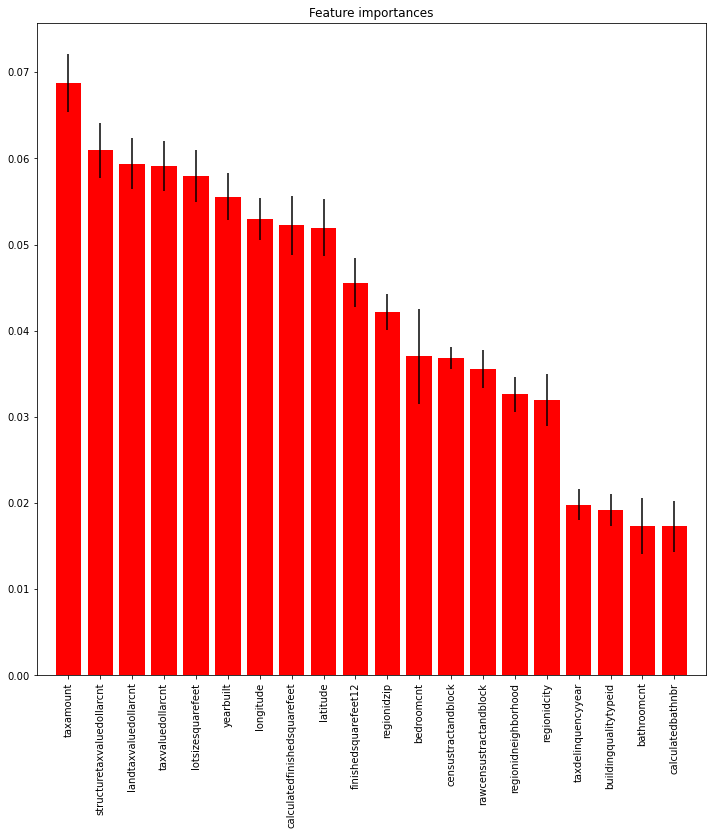

In [68]:
# 차트 출력
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r",
       yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


- 위의 그래프를 참고하면, "tax amount", " structure tax value dollar count" ,"land tax value dollor count" 순으로 중요한 변수인 것 같다.

In [71]:
import xgboost as xgb
xgb_params = {
    'eta' : 0.05,
    'max_depth' : 8,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'objective':'reg:linear',
    'silent':1,
    'seed':0
}

dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

[00:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:04:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


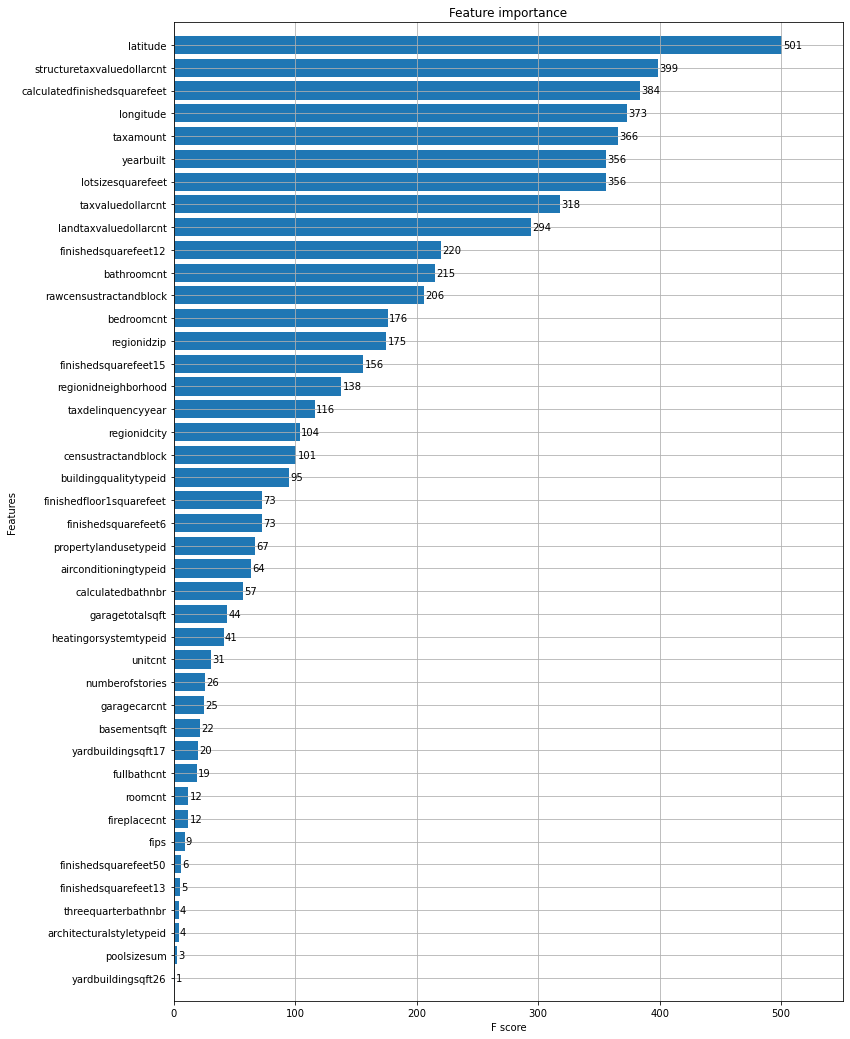

In [72]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

- xgboost를 사용하면 중요도 변수가 'structured tax value dollar count', 'latitude', 'calculated finished square feet' 순으로 나온다.
- 지금까지 EDA 분석한 자료를 활용하여, 회귀 분석에 들어가보자.